<a href="https://colab.research.google.com/github/SnehaRathi123/Mini-Project/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.84 s (started: 2021-05-22 17:20:12 +00:00)


In [47]:
!pip install bing-image-downloader


time: 2.84 s (started: 2021-05-22 17:20:22 +00:00)


In [48]:
!mkdir images


mkdir: cannot create directory ‘images’: File exists
time: 128 ms (started: 2021-05-22 17:20:29 +00:00)


In [49]:
from bing_image_downloader import downloader
downloader.download("red apple",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://wallpaper.sc/en/iphone6/wp-content/uploads/2018/08/iphone6-854x1590-wallpaper_01568.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapershome.com/images/wallpapers/coral-2560x1440-5k-4k-wallpaper-8k-zoanthids-underwater-5358.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://2.bp.blogspot.com/-faLtrm8ZLug/UjAKXiEEDqI/AAAAAAAACMg/LqofSKuIAPc/s1600/IMG_0233.JPG
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/red_hair_diluc_hd_genshin_impact-1920x1080.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://papers.co/wallpaper/papers.co-vq22-color-explosion-red-paint-pattern-soft-41-iphone-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.fonewalls.com/wp-content/uploads/1080x2160-Background-HD-Wallpaper-317-300x585.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://w

In [50]:
downloader.download("mango fruit",limit=30,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/1/1b/Mango_fruits.JPG
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-Pb8HPGlikz4/TpRbzlWWepI/AAAAAAAAAas/NGEeUA-qgZ0/s1600/00001.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://healthyliving.natureloc.com/wp-content/uploads/2015/08/Artificial-ripened-mango-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/5b/84/8f/5b848f427cb1c0b3026c5cec1d6a5343.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/f9/18/7b/f9187b01ceb16077ad15dd4fbb9d7b51.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://haenselblatt.com/img/edible-gardens/ERR/mango-fruit-harvest-learn-when.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://images2.alphacoders.com/481/481967.jpg
[!] Issue getting: https://images2.alphacoders.com/48

In [51]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/images'

categories = ['red apple','mango fruit'] 
target = []
images = []
flat_data = []

for category in categories:
  class_num = categories.index(category)
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) 
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)


flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 22.9 s (started: 2021-05-22 17:23:09 +00:00)


In [52]:
flat_data[0]

array([0.83592157, 0.49453595, 0.49477124, ..., 0.57996026, 0.09435294,
       0.09411765])

time: 9.74 ms (started: 2021-05-22 17:23:34 +00:00)


In [53]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

time: 4.53 ms (started: 2021-05-22 17:23:37 +00:00)


<BarContainer object of 2 artists>

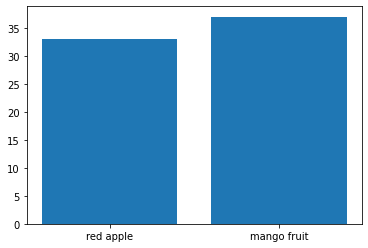

time: 140 ms (started: 2021-05-22 17:23:39 +00:00)


In [54]:
unique,count = np.unique(target,return_counts = True)
plt.bar(categories,count)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                test_size=0.3,random_state=106)

time: 21.5 ms (started: 2021-05-22 17:23:44 +00:00)


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000],'gamma':[0.001,0.0001], 'kernel':['rbf']},
]
svc = svm.SVC(probability =True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 46.9 s (started: 2021-05-22 17:23:45 +00:00)


In [57]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

time: 79 ms (started: 2021-05-22 17:24:36 +00:00)


In [58]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

time: 4.19 ms (started: 2021-05-22 17:24:38 +00:00)


In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix


time: 1.29 ms (started: 2021-05-22 17:24:39 +00:00)


In [60]:
accuracy_score(y_pred,y_test)

0.7619047619047619

time: 5.35 ms (started: 2021-05-22 17:24:41 +00:00)


In [61]:
confusion_matrix(y_pred,y_test)


array([[ 4,  2],
       [ 3, 12]])

time: 5.7 ms (started: 2021-05-22 17:24:48 +00:00)


In [62]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))


time: 32.3 ms (started: 2021-05-22 17:24:51 +00:00)


In [63]:
model = pickle.load(open('img_model.p','rb'))

time: 21.5 ms (started: 2021-05-22 17:24:53 +00:00)


Enter your urlhttps://images.indianexpress.com/2019/04/mangoes-pune-1200.jpg
(667, 1200, 3)
Predicted output: mango fruit


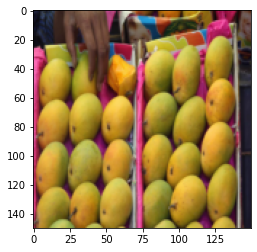

time: 25.9 s (started: 2021-05-22 17:25:37 +00:00)


In [65]:
flat_data=[]
url = input('Enter your url')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'Predicted output: {y_out}')
